# Workshop 3: NumPy and Its Applications in Media

## 1. NumPy
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. Arrays are very frequently used in data science, where speed and resources are very important.
### 1.1 Import NumPy

In [1]:
import numpy as np

### 1.2 List to NumPy array

In [2]:
my_list = [i for i in range(100)]
my_array = np.array(my_list)
my_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### 1.3 NumPy array filled with 0 or 1

In [3]:
zero_array = np.zeros((2,3,4))
one_array = np.ones((2,3,4))
one_array

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

### 1.4 Attributes of NumPy Array
#### 1.4.1 Shape

In [4]:
one_array.shape

(2, 3, 4)

#### 1.4.2 Dimension

In [5]:
one_array.ndim

3

### 1.5 NumPy Operations
#### 1.5.1 Reshape

In [6]:
my_array.reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

#### 1.5.2 Matrix Multiplication

In [8]:
A = np.array([[1, 1],
              [0, 1],
              [5, 2]])

B = np.array([[2, 4, 5],
              [3, 4, 6]])

In [9]:
print(A.shape)
print(B.shape)

(3, 2)
(2, 3)


In [10]:
#B@A
#A.dot(B)
np.matmul(A,B)

array([[ 5,  8, 11],
       [ 3,  4,  6],
       [16, 28, 37]])

#### 1.5.3 Concatenate

In [11]:
A = np.array([[1, 1],
              [0, 1]])

B = np.array([[2, 4],
              [3, 4]])

In [12]:
AB_s = np.stack([A,B])
AB_h = np.hstack([B,A])
AB_v = np.vstack([A,B])
AB_v.shape

(4, 2)

In [13]:
AB = np.concatenate([A,B],axis=1)
AB

array([[1, 1, 2, 4],
       [0, 1, 3, 4]])

## 2. NumPy in different media modality
### 2.1 Image

In [14]:
!pip install opencv-python

In [3]:
import cv2

#### 2.1.2 Grayscale image

In [4]:
img = cv2.imread("test_img.png")
img.shape

(2570, 2040, 3)

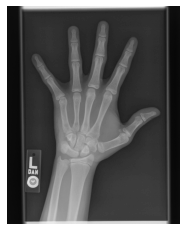

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test_img.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,"gray")
plt.axis("off")
plt.show()
#img.shape

##### Exercise 1. Could you design a script to convert the X-ray image into a binary image?

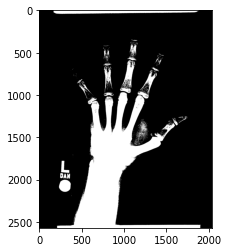

In [6]:
img = cv2.imread("test_img.png",cv2.IMREAD_GRAYSCALE)

threshold = 120
for i in range(len(img)):
    for j in range(len(img[i])):
        if(img[i][j]>=threshold):
            img[i][j]=255
        else:
            img[i][j]=0
            
plt.imshow(img,"gray")
plt.show()

#### 2.1.2 RGB(A) image

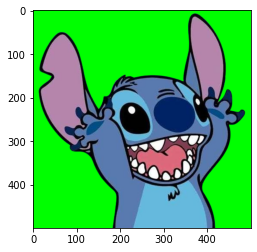

In [7]:
fore_img = cv2.imread("fore.png", cv2.IMREAD_COLOR)
fore_img = cv2.cvtColor(fore_img, cv2.COLOR_BGR2RGB)
plt.imshow(fore_img)

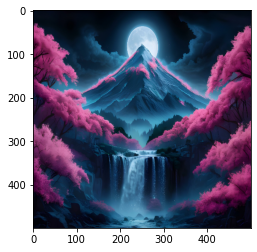

In [8]:
back_img = cv2.imread("back.jpeg", cv2.IMREAD_COLOR)
back_img = cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB)
back_img = cv2.resize(back_img,(500,500))
plt.imshow(back_img)

##### Exercise 2. Could you design a script that replaces the green background in the given foreground image with the landscape background image?

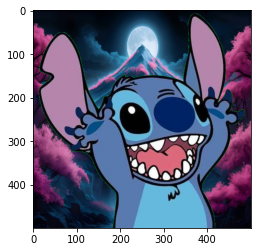

In [9]:
new_img = np.zeros(shape=(500,500,3), dtype=int)
for i in range(500):
    for j in range(500):
        if(100>fore_img[i][j][0]>=0)and(255>=fore_img[i][j][1]>=200)and(100>fore_img[i][j][2]>=0):
            new_img[i][j][0] = back_img[i][j][0]
            new_img[i][j][1] = back_img[i][j][1]
            new_img[i][j][2] = back_img[i][j][2]
        else:
            new_img[i][j][0] = fore_img[i][j][0]
            new_img[i][j][1] = fore_img[i][j][1]
            new_img[i][j][2] = fore_img[i][j][2]
            
plt.imshow(new_img, vmin=0, vmax=255)

### 2.2 Video

In [22]:
import cv2

#Separate the video into frames
video_path = 'test_video.mp4'
cap = cv2.VideoCapture(video_path)

frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame.astype("uint8"), cv2.COLOR_BGR2RGB)
    frames.append(frame)

cap.release()
cv2.destroyAllWindows()

print(f'Total frames extracted: {len(frames)}')

Total frames extracted: 95


In [23]:
frames_array = np.array(frames)
frames_array.shape

(95, 1080, 1920, 3)

### 2.3 Pose
#### 2.3.1 Human body

In [10]:
my_array = np.array([[1,2,3],[4,5,6]])
np.save("MY_ARRAY.npy",my_array)

In [11]:
np.load("MY_ARRAY.npy")

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
pose_array = np.load("test_motion.npy")
pose_array.shape

(311, 22, 3)

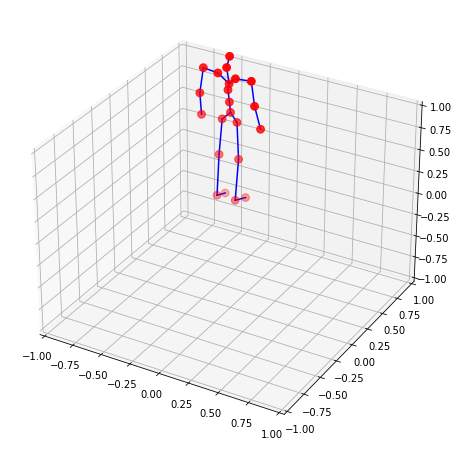

In [19]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection="3d")
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
#ax.view_init(azim=80)
ax.scatter3D(pose_array[0,:,0],pose_array[0,:,2],pose_array[0,:,1],c="r",s=60)
connection = np.array([[0,1],[0,2],[0,3],[2,5],[1,4],
                       [5,8],[4,7],[8,11],[7,10],[3,6],
                       [6,9],[9,12],[12,15],[9,14],[9,13],
                       [14,17],[13,16],[17,19],[19,21],[16,18],[18,20]])

for c in connection:
    ax.plot3D(np.array([pose_array[0,c[0],0],pose_array[0,c[1],0]]),
              np.array([pose_array[0,c[0],2],pose_array[0,c[1],2]]),
              np.array([pose_array[0,c[0],1],pose_array[0,c[1],1]]),c="blue")
plt.show()

#### 2.3.2 Facial expression

In [55]:
import face_alignment

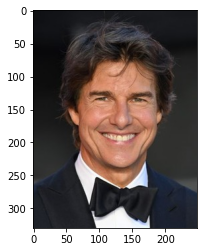

In [62]:
face_img = cv2.imread("human_face.jpg", cv2.IMREAD_COLOR)
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
plt.imshow(face_img)
plt.show()

In [66]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False)
preds = fa.get_landmarks(face_img)[0]

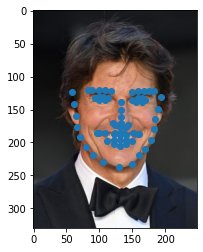

In [70]:
plt.imshow(face_img)
plt.scatter(preds[:,0],preds[:,1])

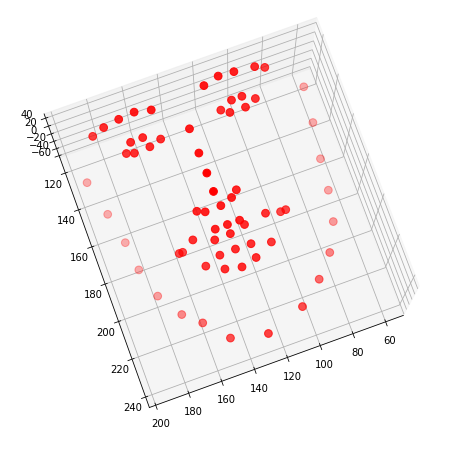

In [75]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection="3d")
ax.scatter3D(preds[:,0],preds[:,1],preds[:,2],c="r",s=60)
ax.view_init(elev=80, azim=70)
plt.show()

### 2.4 Audio

#### 2.4.1 Audio representation
Sound waves can be represented by a mathematical sine wave:

$$
y(t) = A \cdot \sin(2 \pi f t + \phi)
$$

where:
- $ y(t) $ is the amplitude of the wave at time $t $.
- $ A $ (amplitude) controls the loudness of the sound.
- $ f $ (frequency) determines the pitch of the sound.
- $ \phi $ (phase) shifts the wave left or right, which affects how the wave aligns with others but doesn’t impact frequency or loudness directly.

In [25]:
from scipy.io import wavfile

In [101]:
sampling_rate = 44100 
duration = 2.0         
frequency = 420      # Frequency of A4 is 440Hz

# 生成正弦波波形
t = np.linspace(0, duration, int(sampling_rate * duration))
waveform1 = np.sin(2 * np.pi * 420 * t)
waveform2 = np.sin(2 * np.pi * 300 * t+40)
waveform3 = np.sin(2 * np.pi * 500 * t+30)
waveform = waveform1 + waveform2 + waveform3

# 将波形数据写入音频文件
wavfile.write("generated_sine_wave1.wav", sampling_rate, waveform.astype(np.float32))

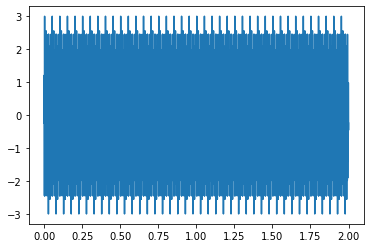

In [102]:
plt.plot(t, waveform)
plt.show()

#### 2.4.2 Loading audio file

In [103]:
!pip install librosa

In [124]:
import librosa

# load audio file
file_path = "test_audio.wav" 
audio_data, sample_rate = librosa.load(file_path, sr=11025)

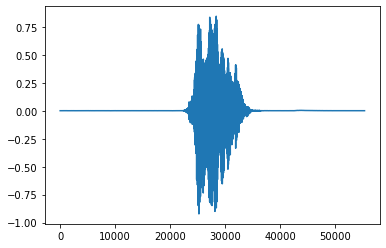

In [125]:
plt.plot(audio_data)

In [126]:
from IPython.display import Audio

Audio(audio_data, rate=sample_rate)

More feature extraction functions: https://librosa.org/doc/latest/feature.html

## 3. Plotting a line
### 3.1 Two Point Method

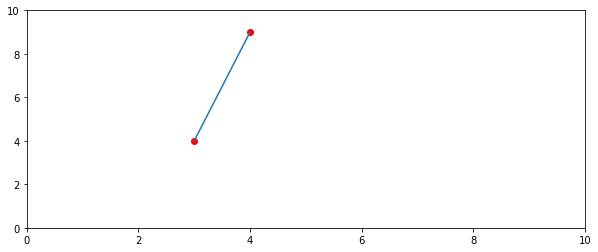

In [29]:
x = [3,4]
y = [4,9]

plt.figure(figsize=[10,4])

plt.xlim(0,10)
plt.ylim(0,10)

#plt.figure(figsize=[2,2])
plt.plot(x,y)
plt.scatter(x,y,c="r")

### 3.2 Slope and Bias Method

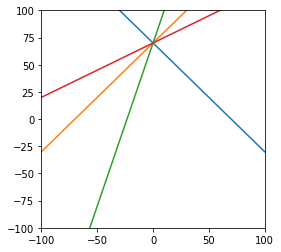

In [38]:
slope_1 = -1
slope_2 = 1
slope_3 = 3
slope_4 = 0.5

bias = 70

plt.figure(figsize=[4,4])
plt.xlim(-100,100)
plt.ylim(-100,100)

x = [-100,100]
y_1 = []
y_2 = []
y_3 = []
y_4 = []

for i in x:
    y_1.append(i*slope_1+bias)
    y_2.append(i*slope_2+bias)
    y_3.append(i*slope_3+bias)
    y_4.append(i*slope_4+bias)

plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)
plt.plot(x,y_4)

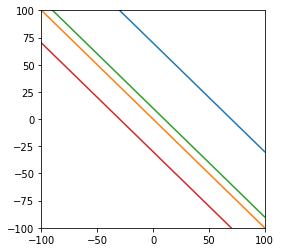

In [39]:

slope_2 = 1

bias_1 = 70
bias_2 = 0
bias_3 = 10
bias_4 = -30

plt.figure(figsize=[4,4])
plt.xlim(-100,100)
plt.ylim(-100,100)

x = [-100,100]
y_1 = []
y_2 = []
y_3 = []
y_4 = []

for i in x:
    y_1.append(i*slope+bias_1)
    y_2.append(i*slope+bias_2)
    y_3.append(i*slope+bias_3)
    y_4.append(i*slope+bias_4)

plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)
plt.plot(x,y_4)

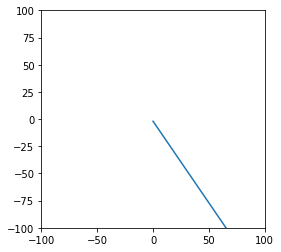

In [44]:
A=3
B=2
C=4

# Ax + By + C = 0
# y = -A/B x -C/B

slope = -A/B
bias = -C/B

plt.figure(figsize=[4,4])
plt.xlim(-100,100)
plt.ylim(-100,100)

x_1 = [0,100]
x_2 = []
for i in x_1:
    x_2.append(i*slope+bias)

plt.plot(x_1,x_2)